## Bike Sharing Demand
### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues. They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

In [1]:
# IMPORTING LIBRARIES
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore") # if there are any warning due to version mismatch, it will be ignored

pd.set_option('display.max_rows', 700, 'display.max_columns', 40)
pd.options.display.float_format = '{:,.2f}'.format

## Step 1: Reading and Understanding the Data

In [2]:
#Let us first import and read the bike dataset
boom_bikes_df = pd.read_csv('day.csv',encoding = "ISO-8859-1", low_memory=False)
boom_bikes_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,82,1518,1600


In [3]:
boom_bikes_df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.42,11.33,65.29,23.46,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.39,12.75,59.00,10.42,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.39,12.12,75.29,8.33,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.49,11.59,48.33,23.50,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.85,11.17,57.75,10.37,439,2290,2729


In [4]:
# checking shape of the dataframe
boom_bikes_df.shape

(730, 16)

In [5]:
boom_bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- We can observe there are no missing or NULL values

In [6]:
boom_bikes_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00
mean,365.50,2.50,0.50,6.53,0.03,3.00,0.68,1.39,20.32,23.73,62.77,12.76,849.25,"3,658.76","4,508.01"
std,210.88,1.11,0.50,3.45,0.17,2.01,0.47,0.54,7.51,8.15,14.24,5.20,686.48,"1,559.76","1,936.01"
min,1.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,2.42,3.95,0.00,1.50,2.00,20.00,22.00
25%,183.25,2.00,0.00,4.00,0.00,1.00,0.00,1.00,13.81,16.89,52.00,9.04,316.25,"2,502.25","3,169.75"
50%,365.50,3.00,0.50,7.00,0.00,3.00,1.00,1.00,20.47,24.37,62.62,12.13,717.00,"3,664.50","4,548.50"
75%,547.75,3.00,1.00,10.00,0.00,5.00,1.00,2.00,26.88,30.45,72.99,15.63,"1,096.50","4,783.25","5,966.00"
max,730.00,4.00,1.00,12.00,1.00,6.00,1.00,3.00,35.33,42.04,97.25,34.00,"3,410.00","6,946.00","8,714.00"


- As we can observe that the mean and median are same, we can conclude that data has no outliers

## Step 2: Visualising the Data

In [7]:
#Rename the columns for better Readability
boom_bikes_df.rename(columns = {'yr':'year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True) 


### Checking unique values

In [8]:
#Find number of unique values in each column
temp_unique = boom_bikes_df.nunique().sort_values()
print(temp_unique)

year            2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
month          12
temp          498
humidity      594
casual        605
windspeed     649
registered    678
atemp         689
count         695
instant       730
dteday        730
dtype: int64


- In unique values response, we can see 'instant' and 'dteday' having all unique values for each entry.
- Instant seems to be a primary key columns, we can drop as this will not be significant.
- We can drop 'dteday' also as we can obtain same Information from 'year'and 'month'.
- As we know that count is equals to casual and registered. Count is our target variable so we are not going to consider casual and registered
- As these columns would not give us any useful insights. so, its better to drop these.

In [9]:
#we will drop above mentioned columns and create a new data set
boom_bikes_df = boom_bikes_df.drop(['instant', 'dteday', 'casual', 'registered'],axis=1)
boom_bikes_df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,985
1,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,801
2,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,1349
3,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,1562
4,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,1600


- We can observe that columns year, holiday, workingday, weathersit, season, weekday, month are categorical variables
- Lets replace weathersit, season, weekday, month with appropriate values per data dictionary for better Readability 

### Fixing Columns

In [10]:
boom_bikes_df['weathersit'] = boom_bikes_df.weathersit.map({1: 'Clear',2:'Mist Cloudy',3:'Light Snow',4:'Snow Fog'})
boom_bikes_df['season']     = boom_bikes_df.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
boom_bikes_df['weekday']    = boom_bikes_df.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
boom_bikes_df['month']      = boom_bikes_df.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

boom_bikes_df.head()


,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,0,Jan,0,Sat,0,Mist Cloudy,14.11,18.18,80.58,10.75,985
1,spring,0,Jan,0,Sun,0,Mist Cloudy,14.90,17.69,69.61,16.65,801
2,spring,0,Jan,0,Mon,1,Clear,8.05,9.47,43.73,16.64,1349
3,spring,0,Jan,0,Tue,1,Clear,8.20,10.61,59.04,10.74,1562
4,spring,0,Jan,0,Wed,1,Clear,9.31,11.46,43.70,12.52,1600


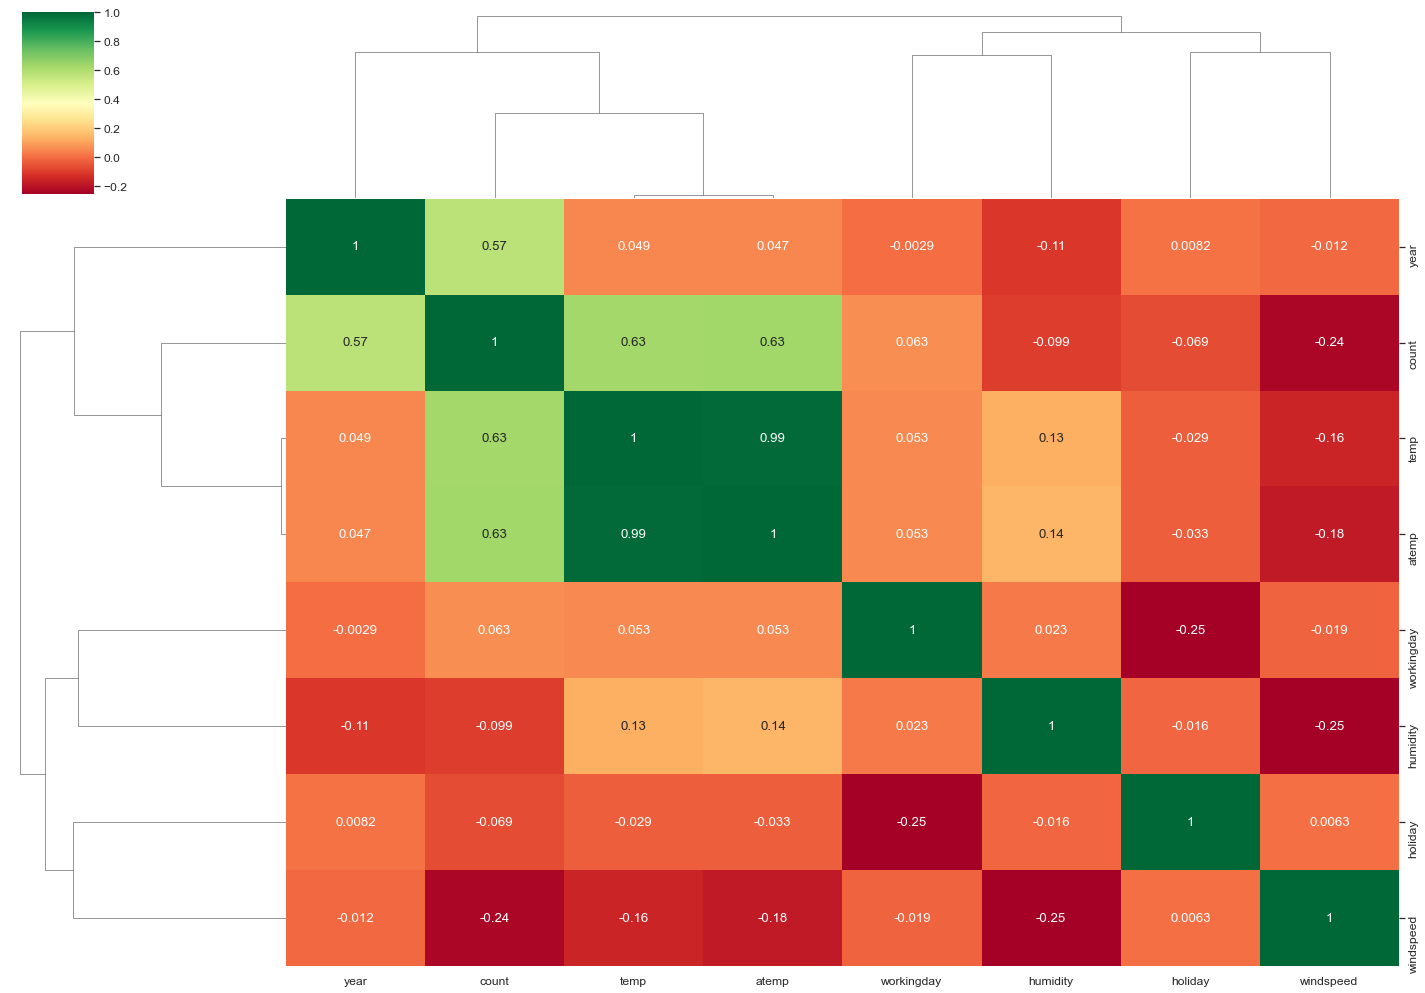

In [11]:
# clubbing continuous or quantitative variable and ordered categorical variable
quantitative_col  = boom_bikes_df.select_dtypes(include=['float64','int64']).columns.to_list() 
bb_df_quantitative = boom_bikes_df[quantitative_col]

# plotting heat map
bb_df_correlation = bb_df_quantitative.corr()
sns.set(font_scale=1.1)
sns.clustermap(bb_df_correlation,annot=True,figsize=(20, 14),cmap="RdYlGn")
plt.show()

- We can observe that count is highly correlated with temprature(temp) and feel temprature(atemp).
- Also, we can observe that atemp and temp are highly correlated with each other.
- Since, Correlation coefficient of temp and atemp with count are same we can drop any of them to avoid multicolinearity

In [12]:
boom_bikes_df = boom_bikes_df.drop(['atemp'], axis = 1)

### Univariate Analysis

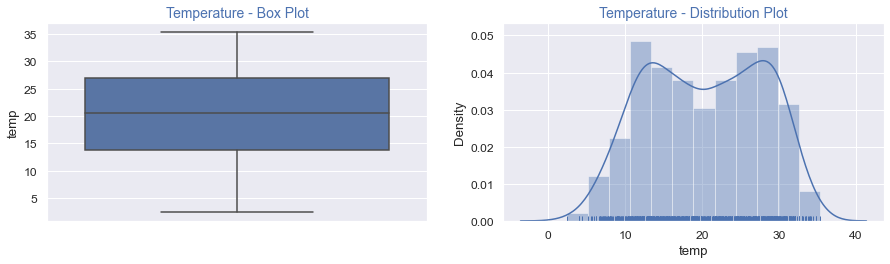

In [13]:
#Adjusting the size of figure to accomodate 2 plots
plt.figure(figsize=(15,8))

#Boxplot plot for Temperature
plt.subplot(2, 2, 1)
ax = sns.boxplot(y=boom_bikes_df.temp)
ax.set_title('Temperature - Box Plot',fontsize=14,color='b')

#Histogram plot for Temperature
plt.subplot(2, 2, 2)
ax = sns.distplot(boom_bikes_df.temp, rug = True)
ax.set_title('Temperature - Distribution Plot',fontsize=14,color='b')

plt.show()

**OBSERVATION** - There is no outlier in the temprature and most temprature are between 10 to 35.75 range

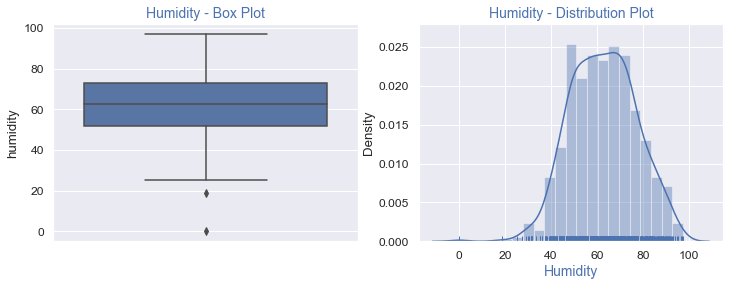

In [14]:
#Adjusting the size of figure to accomodate 2 plots
plt.figure(figsize=(12,4))

#Boxplot plot for Humidity
plt.subplot(1, 2, 1)
ax = sns.boxplot(y=boom_bikes_df.humidity)
ax.set_title('Humidity - Box Plot',fontsize=14,color='b')

#Histogram plot for Humidity
plt.subplot(1, 2, 2)
ax = sns.distplot(boom_bikes_df.humidity, rug = True)
ax.set_title('Humidity - Distribution Plot',fontsize=14,color='b')
ax.set_xlabel('Humidity',fontsize=14,color='b')
plt.show()

**OBSERVATION** - There is no outlier in the humidity and most of the humidity are between 40 to 87 range

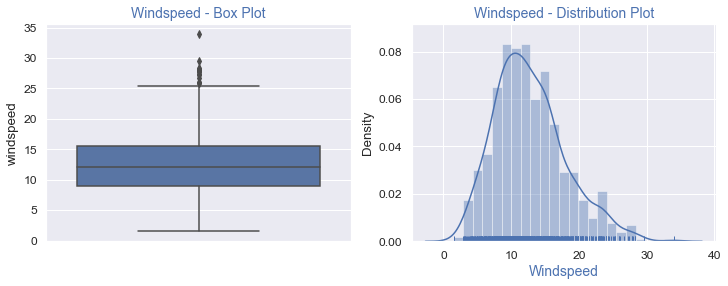

In [15]:
#Adjusting the size of figure to accomodate 2 plots
plt.figure(figsize=(12,4))

#Boxplot plot for Windspeed
plt.subplot(1, 2, 1)
ax = sns.boxplot(y=boom_bikes_df.windspeed)
ax.set_title('Windspeed - Box Plot',fontsize=14,color='b')

#Histogram plot for Windspeed
plt.subplot(1, 2, 2)
ax = sns.distplot(boom_bikes_df.windspeed, rug = True)
ax.set_title('Windspeed - Distribution Plot',fontsize=14,color='b')
ax.set_xlabel('Windspeed',fontsize=14,color='b')
plt.show()

**OBSERVATION** - There is no outlier in the Windspeed and most of the Windspeed are between 5 to 23 range

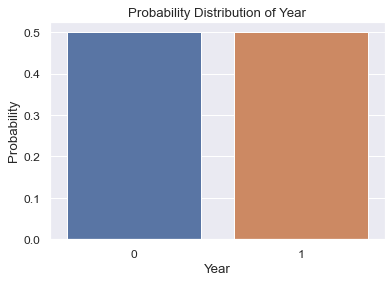

In [16]:
#Bar plot for Year
sns.barplot(x='index', y='year', data=boom_bikes_df['year'].value_counts(normalize=True).reset_index())
plt.xlabel('Year')
plt.ylabel('Probability')
plt.title('Probability Distribution of Year')
plt.show()

- Both year has similer Probability Distribution 

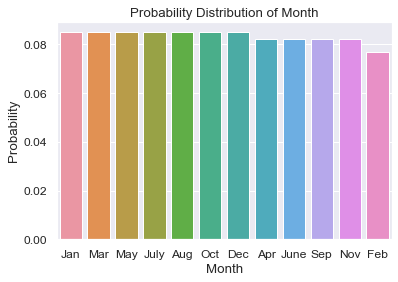

In [17]:
#Bar plot for Month
sns.barplot(x='index', y='month', data=boom_bikes_df['month'].value_counts(normalize=True).reset_index())
plt.xlabel('Month')
plt.ylabel('Probability')
plt.title('Probability Distribution of Month')
plt.show()

- Probability Distribution for the months(Jan,Mar,May,Jul,Aug,Oct,Dec) are similer 
- Probability Distribution for the months(Apr,Jun,Sep,Nov) are similer and less then above set of months
- Probability Distribution for the months(Feb) is less then both above sets

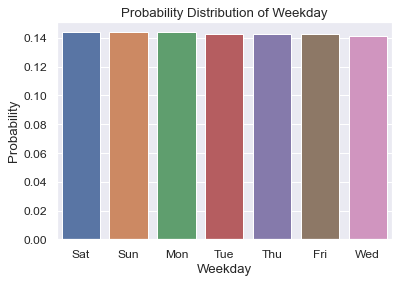

In [18]:
#Bar plot for Weekday
sns.barplot(x='index', y='weekday', data=boom_bikes_df['weekday'].value_counts(normalize=True).reset_index())
plt.xlabel('Weekday')
plt.ylabel('Probability')
plt.title('Probability Distribution of Weekday')
plt.show()

- Probability Distribution for the Days(Sat,Sun,Mon) are similer 
- Probability Distribution for the Days(Tue,Thu,Fri,Nov) are similer and less then above set of days
- Probability Distribution for the Day(Wed) is less then both above sets of days
- All weekdays have between 13.5%-14.8% of total booking and thus shows very close trend.

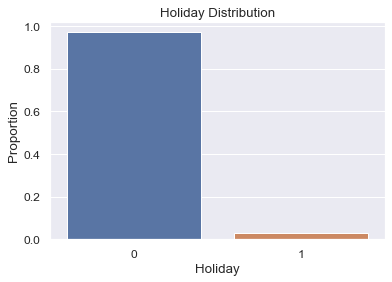

In [19]:
#Bar plot for Holiday
sns.barplot(x='index', y='holiday', data=boom_bikes_df['holiday'].value_counts(normalize=True).reset_index())
plt.xlabel('Holiday')
plt.ylabel('Proportion')
plt.title('Holiday Distribution')
plt.show()

- Probability Distribution for non_holidays are greater then holidays and is almost 97.6%

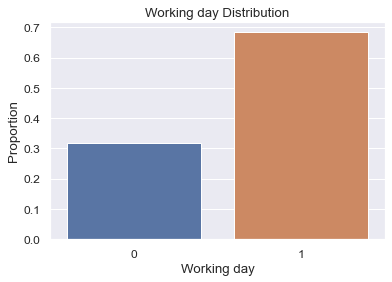

In [20]:
#Bar plot for Working day
sns.barplot(x='index', y='workingday', data=boom_bikes_df['workingday'].value_counts(normalize=True).reset_index())
plt.xlabel('Working day')
plt.ylabel('Proportion')
plt.title('Working day Distribution')
plt.show()

- Probability Distribution for working_day are greater then non_working_day
- Almost 69% of the bike booking were done on working_day

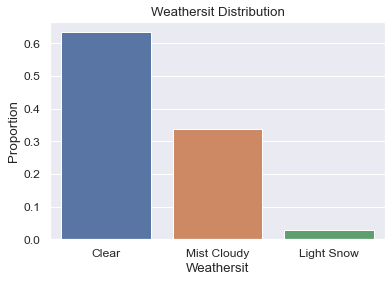

In [21]:
#Bar plot for Weathersit
sns.barplot(x='index', y='weathersit', data=boom_bikes_df['weathersit'].value_counts(normalize=True).reset_index())
plt.xlabel('Weathersit')
plt.ylabel('Proportion')
plt.title('Weathersit Distribution')
plt.show()

- Probability Distribution for Clear(Clear, Few clouds, Partly cloudy, Partly cloudy) is greateer then Mist Cloudy
(Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist). Almost 67% of the bike booking were happening in these conditions
- Probability Distribution for Mist Cloudy(30% of total booking) is greater then Light Snow

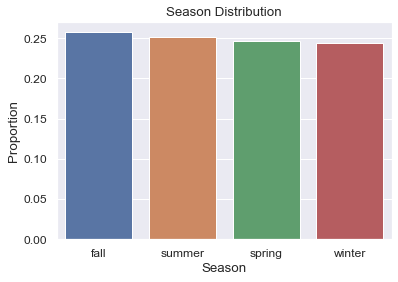

In [22]:
#Bar plot for Season
sns.barplot(x='index', y='season', data=boom_bikes_df['season'].value_counts(normalize=True).reset_index())
plt.xlabel('Season')
plt.ylabel('Proportion')
plt.title('Season Distribution')
plt.show()

- Probability Distribution for Fall is greateer then Summer and is above 25%
- Probability Distribution for Summer is greater then Spring and is almost 25%
- Probability Distribution for spring is greater then Winter
- Almost 26% of the bike booking were done in fall for the period of 2 years

### Bivariate Analysis

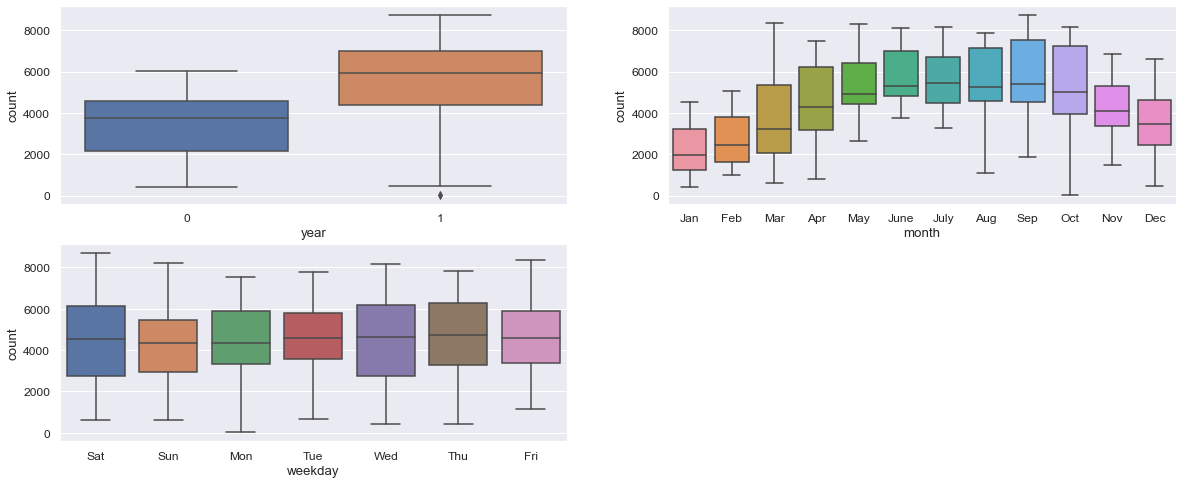

In [23]:
#Adjusting the size of figure to accomodate 3 plots
plt.figure(figsize=(20, 8))

#Boxplot plot for year
plt.subplot(2,2,1)
sns.boxplot(x = 'year', y = 'count', data = boom_bikes_df)

#Boxplot plot for month
plt.subplot(2,2,2)
sns.boxplot(x = 'month', y = 'count', data = boom_bikes_df)

#Boxplot plot for weekday
plt.subplot(2,2,3)
sns.boxplot(x = 'weekday', y = 'count', data = boom_bikes_df)


plt.show()

- Year
    - The number of bike shares incresed in 2019
- Month
  - The count of bike sharing values increases in summer months
  - Almost 10% of the bike booking were done in the months 5,6,7,8 & 9 
  - There is a median of over 4000 booking per month. 
  - The month of September have highest no of rentals while December have least. This observation is on par with the observation made in weathersit. The weather situation in December is usually have heavy snow.
  - This indicates, month has some trend for bookings and can be a good predictor for count. 
  
- weekday: 
  - Weekday has medians are between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. 


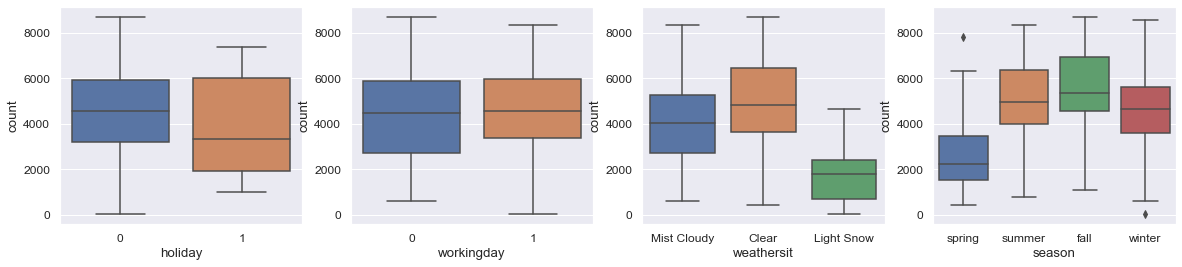

In [24]:
#Adjusting the size of figure to accomodate 4 plots
plt.figure(figsize=(20, 4))

#Boxplot plot for holiday
plt.subplot(1,4,1)
sns.boxplot(x = 'holiday', y = 'count', data = boom_bikes_df)

#Boxplot plot for workingday
plt.subplot(1,4,2)
sns.boxplot(x = 'workingday', y = 'count', data = boom_bikes_df)

#Boxplot plot for weathersit
plt.subplot(1,4,3)
sns.boxplot(x = 'weathersit', y = 'count', data = boom_bikes_df)

#Boxplot plot for season
plt.subplot(1,4,4)
sns.boxplot(x = 'season', y = 'count', data = boom_bikes_df)


plt.show()

- Holiday:
  - The count of bike sharing values ars less during holidays
  - This data is clearly biased as almost 97.6% of the bike booking were done during non-holiday.
  - Bike Booking counts reduced during holiday
  - Indicates holiday can not be a good predictor for the count.
  
- Working day
    - The median of non-working and working days are almost same
    - The median of close to 5000 booking for the period of 2 years. 
    - Indicated workingday can be a good predictor for the dependent variable.
- Weathersit
    - Weathersit have a median of close to 5000 booking for the period of 2 years. 
    - This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the count.
    - The count of bike sharing has few zero values for weather situation - 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'
    - There are no users when there is heavy rain or snow indicating that this weather is extremely unfavorable. Highest counts were seen when the weathersit was ‘Clear, Partly Cloudy’.

- Season
    - Fall has a median of over 5000 booking, This is followed by summer & winter.
    - The count of bike sharing is least for spring
    - The boxplot indicates that spring season had least value of booking counts whereas fall had maximum values. Summer and winter had moderate value for bike booking counts.
    - Indicates, season can be a good predictor for the dependent variable. 

### Multivariate Analysis - Pair Plots

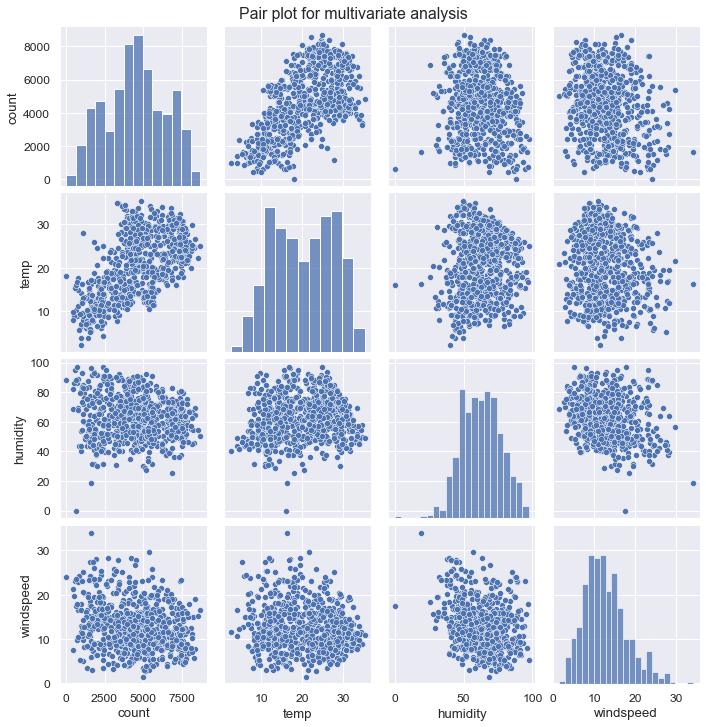

In [25]:
# Draw a pair plot for multivariate analysis
boom_bikes_df_pair = boom_bikes_df[['count','temp', 'humidity', 'windspeed']].copy()

# Create a pair plot colored by count with a density plot...
ax = sns.pairplot(boom_bikes_df_pair)
ax.fig.suptitle("Pair plot for multivariate analysis", y=1.01) 

plt.show()


- Temp has high coorelation with count compare to humidity and windspeed

In [26]:
# Now we can assume this data set as final  
final_boom_bikes_df = boom_bikes_df.copy()

## Step 3: Data Preparation

### Create Dummy Columns

In [27]:
#creating dummy variables with drop first option
final_boom_bikes_df = pd.get_dummies(final_boom_bikes_df, drop_first=True)
final_boom_bikes_df.head()

,year,holiday,workingday,temp,humidity,windspeed,count,season_spring,season_summer,season_winter,month_Aug,month_Dec,month_Feb,month_Jan,month_July,month_June,month_Mar,month_May,month_Nov,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist Cloudy
0,0,0,0,14.11,80.58,10.75,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.90,69.61,16.65,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.05,43.73,16.64,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.20,59.04,10.74,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.31,43.70,12.52,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [28]:
#cheching the info
final_boom_bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    730 non-null    int64  
 1   holiday                 730 non-null    int64  
 2   workingday              730 non-null    int64  
 3   temp                    730 non-null    float64
 4   humidity                730 non-null    float64
 5   windspeed               730 non-null    float64
 6   count                   730 non-null    int64  
 7   season_spring           730 non-null    uint8  
 8   season_summer           730 non-null    uint8  
 9   season_winter           730 non-null    uint8  
 10  month_Aug               730 non-null    uint8  
 11  month_Dec               730 non-null    uint8  
 12  month_Feb               730 non-null    uint8  
 13  month_Jan               730 non-null    uint8  
 14  month_July              730 non-null    ui

In [29]:
#cheching the shape
final_boom_bikes_df.shape

(730, 29)

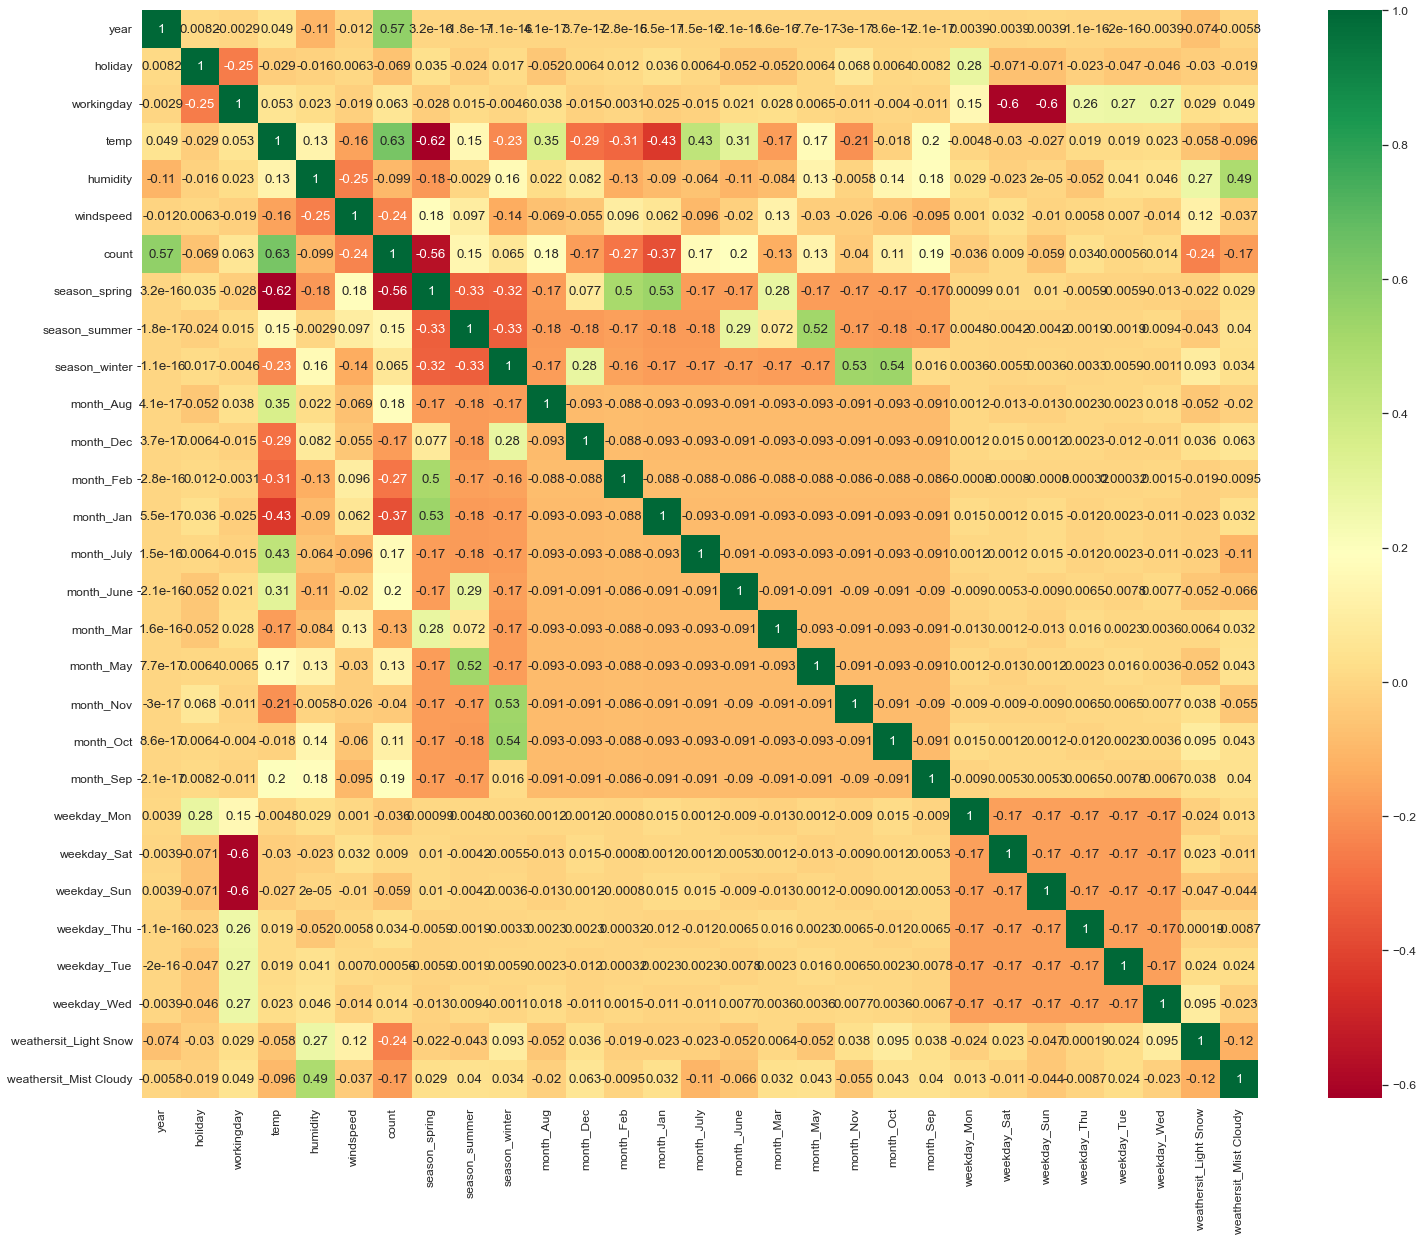

In [30]:
#Lets check again the correlation between Columns 
#draw a Heatmap to check correlation
plt.figure(figsize=(25, 20))
sns.set(font_scale=1.1)
sns.heatmap(final_boom_bikes_df.corr(), annot = True,cmap="RdYlGn")
plt.show()

**Observations** 
- We can observe  that year, temperature,Summer season,months(June to october) are in good correlation with the 'count' column. 
- These columns seem to have good influence on the number of bike rentals.

## Step 4: Splitting the Data into Training and Testing Sets

- Splitting the data to Train and Test: - We will now split the data into TRAIN and TEST (70:30 ratio) 
- We will use train_test_split method from sklearn package for this


In [31]:
from sklearn.model_selection import train_test_split

# We specify 'random_state' so that the train and test data set always have the same rows
np.random.seed(0)
df_train, df_test = train_test_split(final_boom_bikes_df, train_size = 0.80, test_size = 0.20, random_state = 333)


- Verify the info and shape of the dataframes after split:

In [32]:
# printing test and train Information
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584 entries, 155 to 419
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    584 non-null    int64  
 1   holiday                 584 non-null    int64  
 2   workingday              584 non-null    int64  
 3   temp                    584 non-null    float64
 4   humidity                584 non-null    float64
 5   windspeed               584 non-null    float64
 6   count                   584 non-null    int64  
 7   season_spring           584 non-null    uint8  
 8   season_summer           584 non-null    uint8  
 9   season_winter           584 non-null    uint8  
 10  month_Aug               584 non-null    uint8  
 11  month_Dec               584 non-null    uint8  
 12  month_Feb               584 non-null    uint8  
 13  month_Jan               584 non-null    uint8  
 14  month_July              584 non-null    

In [33]:
# printing test and train shapes
print(df_train.shape)
print(df_test.shape)

(584, 29)
(146, 29)


### Rescaling the features

In [34]:
#importing MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler = MinMaxScaler()

In [36]:
# Checking the values before scaling
df_train.head()

,year,holiday,workingday,temp,humidity,windspeed,count,season_spring,season_summer,season_winter,month_Aug,month_Dec,month_Feb,month_Jan,month_July,month_June,month_Mar,month_May,month_Nov,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist Cloudy
155,0,0,0,26.58,65.25,9.29,4906,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
697,1,0,1,11.52,55.57,7.74,5323,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
232,0,0,0,29.14,77.00,16.67,3873,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
114,0,0,1,24.87,77.67,12.42,4073,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
392,1,0,0,12.95,54.33,14.13,4023,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


- All the numeric columns are now mapped between 0 and 1

In [37]:
# Let's check the correlation coefficients to check if columns are highly correlated after scaling
df_train.corr()

,year,holiday,workingday,temp,humidity,windspeed,count,season_spring,season_summer,season_winter,month_Aug,month_Dec,month_Feb,month_Jan,month_July,month_June,month_Mar,month_May,month_Nov,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist Cloudy
year,1.00,0.01,-0.01,0.04,-0.12,0.02,0.57,-0.00,-0.02,0.03,-0.00,0.02,-0.03,-0.00,-0.01,-0.01,0.03,-0.00,0.01,0.01,-0.01,-0.00,0.02,-0.01,-0.01,0.02,-0.03,-0.07,-0.03
holiday,0.01,1.00,-0.24,-0.03,-0.03,0.01,-0.05,0.01,-0.04,0.06,-0.05,-0.05,-0.01,0.07,0.03,-0.05,-0.05,-0.01,0.11,0.03,-0.01,0.27,-0.07,-0.07,-0.00,-0.07,-0.04,-0.03,-0.00
workingday,-0.01,-0.24,1.00,0.04,0.03,-0.04,0.04,-0.01,-0.00,-0.01,0.04,-0.03,0.02,-0.03,-0.04,0.00,0.04,0.00,-0.01,-0.01,0.01,0.17,-0.62,-0.59,0.25,0.28,0.27,0.04,0.03
temp,0.04,-0.03,0.04,1.00,0.15,-0.15,0.62,-0.62,0.15,-0.23,0.38,-0.27,-0.31,-0.43,0.42,0.29,-0.17,0.17,-0.23,-0.03,0.19,-0.01,-0.03,-0.01,0.01,0.01,0.05,-0.03,-0.09
humidity,-0.12,-0.03,0.03,0.15,1.00,-0.26,-0.08,-0.21,0.01,0.15,0.03,0.11,-0.15,-0.12,-0.06,-0.10,-0.07,0.13,-0.03,0.14,0.17,0.02,-0.02,-0.00,-0.03,0.03,0.03,0.23,0.50
windspeed,0.02,0.01,-0.04,-0.15,-0.26,1.00,-0.22,0.17,0.09,-0.13,-0.06,-0.07,0.11,0.09,-0.10,-0.02,0.09,-0.05,0.00,-0.09,-0.08,0.00,0.03,0.02,0.02,0.01,-0.03,0.10,-0.03
count,0.57,-0.05,0.04,0.62,-0.08,-0.22,1.00,-0.55,0.12,0.07,0.18,-0.16,-0.28,-0.36,0.17,0.18,-0.11,0.13,-0.05,0.10,0.20,-0.04,0.02,-0.06,0.02,0.00,0.01,-0.23,-0.18
season_spring,-0.00,0.01,-0.01,-0.62,-0.21,0.17,-0.55,1.00,-0.33,-0.32,-0.19,0.10,0.51,0.53,-0.17,-0.16,0.29,-0.18,-0.17,-0.17,-0.17,0.00,0.02,-0.02,-0.00,0.04,-0.02,-0.04,0.02
season_summer,-0.02,-0.04,-0.00,0.15,0.01,0.09,0.12,-0.33,1.00,-0.32,-0.19,-0.17,-0.17,-0.18,-0.17,0.28,0.06,0.53,-0.18,-0.17,-0.18,-0.02,0.01,0.01,0.02,-0.05,0.01,-0.01,0.05
season_winter,0.03,0.06,-0.01,-0.23,0.15,-0.13,0.07,-0.32,-0.32,1.00,-0.18,0.25,-0.16,-0.17,-0.17,-0.16,-0.17,-0.17,0.55,0.54,0.03,0.01,-0.04,0.03,0.00,-0.02,-0.02,0.07,0.03


- We can observe little to no multicollinearity among predictors

In [38]:
# Apply scaler to all the numeric variables
num_vars = ['temp', 'humidity', 'windspeed','count']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [39]:
# Checking values after scaling
df_train.head()

,year,holiday,workingday,temp,humidity,windspeed,count,season_spring,season_summer,season_winter,month_Aug,month_Dec,month_Feb,month_Jan,month_July,month_June,month_Mar,month_May,month_Nov,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist Cloudy
155,0,0,0,0.73,0.68,0.24,0.56,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
697,1,0,1,0.28,0.58,0.19,0.61,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
232,0,0,0,0.81,0.80,0.47,0.44,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
114,0,0,1,0.68,0.81,0.34,0.47,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
392,1,0,0,0.32,0.56,0.39,0.46,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [40]:
df_train.describe()

,year,holiday,workingday,temp,humidity,windspeed,count,season_spring,season_summer,season_winter,month_Aug,month_Dec,month_Feb,month_Jan,month_July,month_June,month_Mar,month_May,month_Nov,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist Cloudy
count,584.00,584.00,584.00,584.00,584.00,584.00,584.00,584.00,584.00,584.00,584.00,584.00,584.00,584.00,584.00,584.00,584.00,584.00,584.00,584.00,584.00,584.00,584.00,584.00,584.00,584.00,584.00,584.00,584.00
mean,0.51,0.03,0.68,0.55,0.65,0.35,0.52,0.24,0.25,0.24,0.10,0.08,0.08,0.08,0.08,0.08,0.08,0.09,0.09,0.08,0.09,0.15,0.15,0.14,0.14,0.14,0.14,0.02,0.34
std,0.50,0.16,0.47,0.23,0.15,0.16,0.22,0.43,0.43,0.43,0.30,0.26,0.27,0.28,0.27,0.27,0.27,0.28,0.28,0.27,0.28,0.35,0.36,0.35,0.34,0.35,0.35,0.15,0.47
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.35,0.54,0.23,0.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,1.00,0.00,1.00,0.55,0.65,0.33,0.52,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,1.00,0.00,1.00,0.74,0.76,0.43,0.70,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


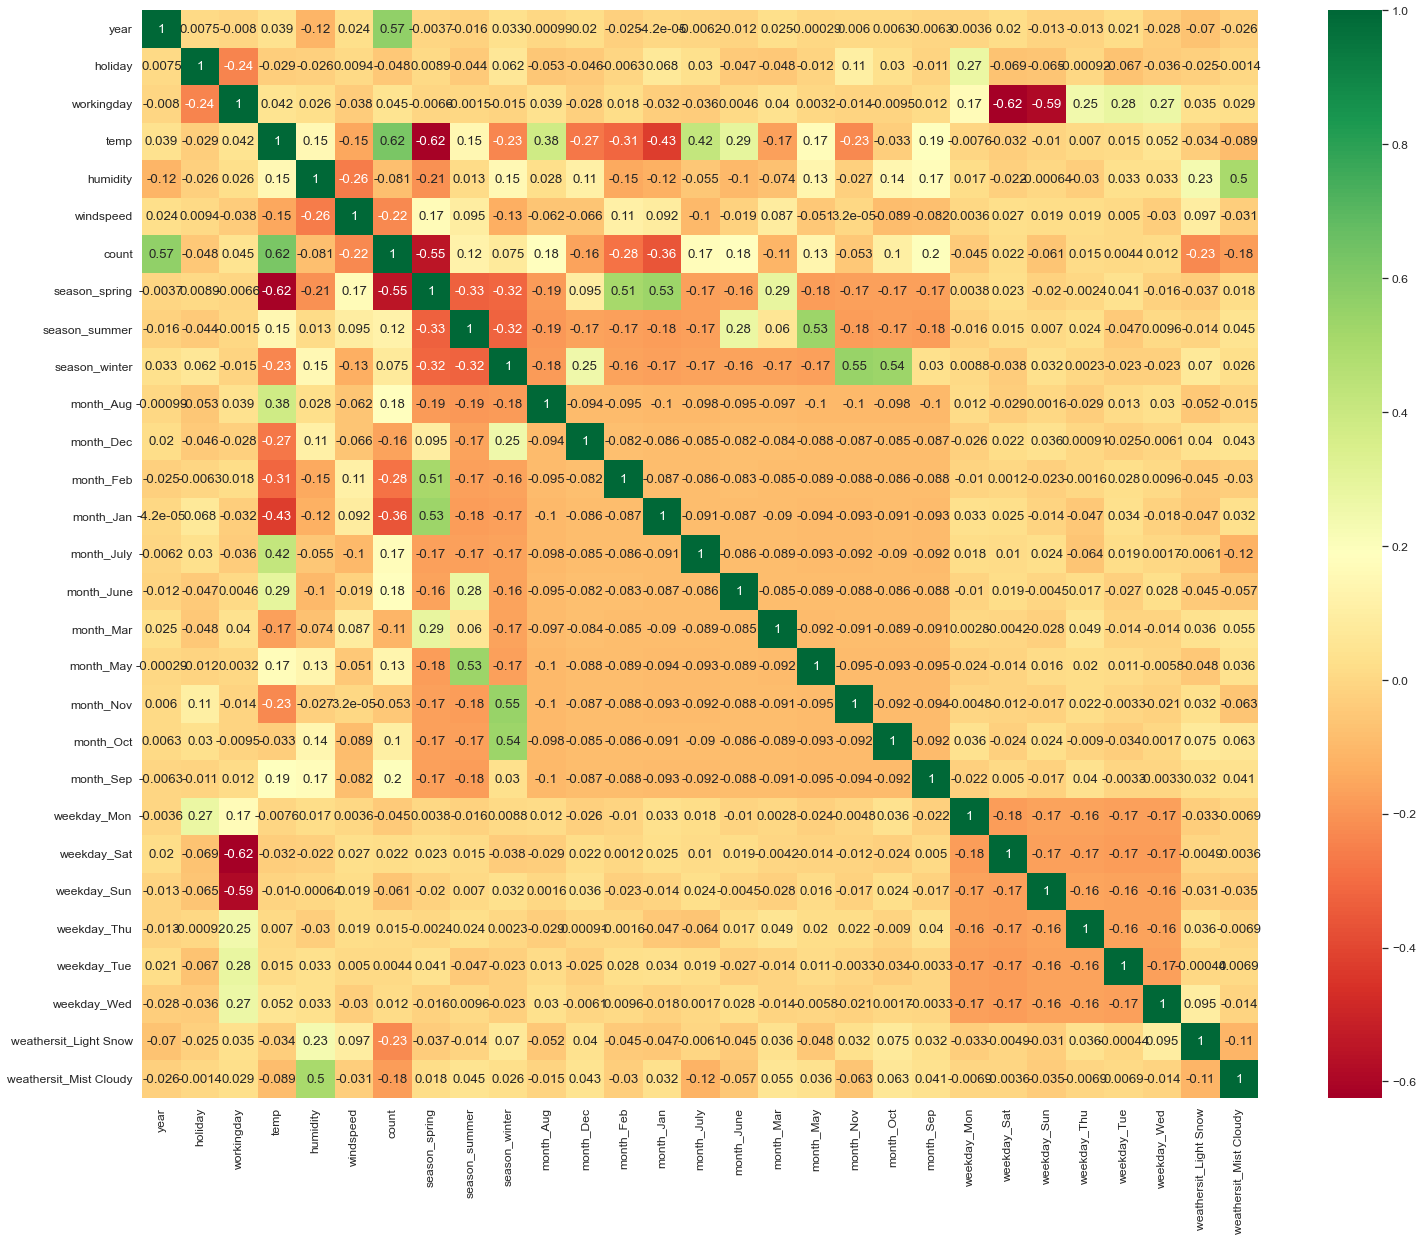

In [41]:
# Let's check the correlation coefficients to see which variables are highly correlated after scaling
plt.figure(figsize=(25, 20))
sns.heatmap(df_train.corr(),cmap='RdYlGn',annot = True)
plt.show()

- We can observe from the heatmapabove that temp, year is  correlated to the 'count' variable. 
- Even for months(August, September) we can observe the counts has a bit higher side coefficient.

## Step 5: Building a linear model

#### Divide into sets(X,Y) for model building

In [42]:
#Divide the data into sets(X, y)
y_train = df_train.pop('count')
X_train = df_train

####  **Recursive Feature Elimination**(RFE)

In [43]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [44]:
# getting a linear regression model and fit the sets
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [45]:
print(X_train.shape)
print(y_train.shape)

(584, 28)
(584,)


- choosing RFE Approach for Feature selection

In [46]:
#Running RFE on linear regression model
rfe = RFE(lm)            

In [47]:
rfe = rfe.fit(X_train, y_train)

In [48]:
# print list of variables selected by RFE approach

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 15),
 ('season_winter', True, 1),
 ('month_Aug', False, 9),
 ('month_Dec', False, 2),
 ('month_Feb', False, 5),
 ('month_Jan', False, 4),
 ('month_July', True, 1),
 ('month_June', False, 14),
 ('month_Mar', False, 8),
 ('month_May', False, 6),
 ('month_Nov', True, 1),
 ('month_Oct', False, 13),
 ('month_Sep', True, 1),
 ('weekday_Mon', False, 7),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 11),
 ('weekday_Tue', False, 10),
 ('weekday_Wed', False, 12),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist Cloudy', False, 3)]

In [49]:
#Select variables where RFE support is True
X_train_rfe_col = X_train.columns[rfe.support_]
X_train_rfe_col

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'season_spring', 'season_winter', 'month_July', 'month_Nov',
       'month_Sep', 'weekday_Sat', 'weekday_Sun', 'weathersit_Light Snow'],
      dtype='object')

In [50]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[X_train_rfe_col]

#### Build Model using StatsModel APIs

In [51]:
# As we are going to repeat the model builing and VIF checking
# Lets create function for these activities

from statsmodels.stats.outliers_influence import variance_inflation_factor
# import statsmodels
import statsmodels.api as sm  

# function to check for the VIF values for the selected feature variables. 
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    # return VIF
    return(vif)

# function to build model
def build_SModel(X,y):
    #add a constant to make set a 2 dimension
    X = sm.add_constant(X)
    # Statsmodel linear model object on RFE selected variables
    lrm = sm.OLS(y,X).fit() 
    #return 
    return lrm

 #### Model 1
 ***Check VIF(Variable Inflation Factors)***
 ### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [52]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
checkVIF(X_train_rfe)

,Features,VIF
2,workingday,41.93
11,weekday_Sat,10.06
12,weekday_Sun,9.28
3,temp,3.00
6,season_spring,2.64
1,holiday,2.60
7,season_winter,2.06
9,month_Nov,1.53
8,month_July,1.32
4,humidity,1.27


In [53]:
# Create a fitted model
lrm1= build_SModel(X_train_rfe, y_train)
print(lrm1.summary()) 

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     216.9
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          8.97e-211
Time:                        03:09:11   Log-Likelihood:                 566.77
No. Observations:                 584   AIC:                            -1106.
Df Residuals:                     570   BIC:                            -1044.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.31

**- Removing variable 'workingday' based on its High VIF**


In [54]:
X_train_new = X_train_rfe.drop(["workingday"], axis = 1)

#### Model 2 
***Check VIF***

In [55]:
# Check for the VIF values of the feature variables. 
checkVIF(X_train_new)

,Features,VIF
3,humidity,14.80
2,temp,13.37
4,windspeed,5.04
6,season_winter,2.44
5,season_spring,2.40
0,year,2.07
8,month_Nov,1.64
7,month_July,1.43
10,weekday_Sat,1.22
9,month_Sep,1.21


In [56]:
# Create a fitted model
lrm2 = build_SModel(X_train_new, y_train)
print(lrm2.summary()) 

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     216.9
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          8.97e-211
Time:                        03:09:11   Log-Likelihood:                 566.77
No. Observations:                 584   AIC:                            -1106.
Df Residuals:                     570   BIC:                            -1044.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.40

**- Removing the variable 'humidity' based on its High VIF**

In [57]:
X_train_new = X_train_new.drop(["humidity"], axis = 1)

#### Model 3
***Check VIF***

In [58]:
# Check for the VIF values of the feature variables. 
checkVIF(X_train_new)

,Features,VIF
2,temp,5.04
3,windspeed,4.99
0,year,2.06
5,season_winter,1.93
4,season_spring,1.70
7,month_Nov,1.63
6,month_July,1.37
9,weekday_Sat,1.21
8,month_Sep,1.20
10,weekday_Sun,1.20


In [59]:
# Create a fitted model
lrm3 = build_SModel(X_train_new, y_train)
print(lrm3.summary()) 

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     194.2
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          1.51e-192
Time:                        03:09:11   Log-Likelihood:                 520.86
No. Observations:                 584   AIC:                            -1016.
Df Residuals:                     571   BIC:                            -958.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.21

**- Removing the variable 'month_Nov' based on its High p-value and also looks less significant**

In [60]:
X_train_new = X_train_new.drop(["month_Nov"], axis = 1)

#### Model 4
***Check VIF***

In [61]:
# Check for the VIF values of the feature variables. 
checkVIF(X_train_new)

,Features,VIF
2,temp,4.97
3,windspeed,4.90
0,year,2.06
4,season_spring,1.69
5,season_winter,1.37
6,month_July,1.37
8,weekday_Sat,1.21
9,weekday_Sun,1.20
7,month_Sep,1.19
1,holiday,1.05


In [62]:
# Create a fitted model
lrm4 = build_SModel(X_train_new, y_train)
print(lrm4.summary()) 

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     210.8
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          4.66e-193
Time:                        03:09:11   Log-Likelihood:                 519.29
No. Observations:                 584   AIC:                            -1015.
Df Residuals:                     572   BIC:                            -962.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.21

**- Removing variable 'weekday_Sat' based on its high p-va;ue as it looks less significant**

In [63]:
X_train_new = X_train_new.drop(["weekday_Sat"], axis = 1)

#### Model 5
***Check VIF***

In [64]:
# Check for the VIF values of the feature variables. 
checkVIF(X_train_new)

,Features,VIF
2,temp,4.93
3,windspeed,4.86
0,year,2.06
4,season_spring,1.68
5,season_winter,1.37
6,month_July,1.37
7,month_Sep,1.19
8,weekday_Sun,1.17
9,weathersit_Light Snow,1.05
1,holiday,1.04


In [65]:
# Create a fitted model
lrm5 = build_SModel(X_train_new, y_train)
print(lrm5.summary()) 

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     231.5
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          6.93e-194
Time:                        03:09:11   Log-Likelihood:                 518.43
No. Observations:                 584   AIC:                            -1015.
Df Residuals:                     573   BIC:                            -966.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.21

**- Removing variable 'windspeed' based on its slightly high VIF and also looking less significant**

In [66]:
X_train_new = X_train_new.drop(["windspeed"], axis = 1)

#### Model 6
***Check VIF***

In [67]:
# Check for the VIF values of the feature variables. 
checkVIF(X_train_new)

,Features,VIF
2,temp,2.66
0,year,2.04
5,month_July,1.33
4,season_winter,1.31
3,season_spring,1.22
6,month_Sep,1.18
7,weekday_Sun,1.16
1,holiday,1.04
8,weathersit_Light Snow,1.03


In [68]:
# Create a fitted model
lrm6 = build_SModel(X_train_new, y_train)
print(lrm6.summary()) 

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     244.2
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          8.39e-190
Time:                        03:09:11   Log-Likelihood:                 505.97
No. Observations:                 584   AIC:                            -991.9
Df Residuals:                     574   BIC:                            -948.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.15

 - **This model 6 looks good as we can observe there seems to be very low to no Multicollinearity between the predictors**
 - **The p-values for all the predictors seems to be significant.**
 - **For now, we can consider this one as our final model.**

In [69]:
# Check the parameters obtained
lrm6.params

const                    0.16
year                     0.24
holiday                 -0.07
temp                     0.49
season_spring           -0.11
season_winter            0.06
month_July              -0.04
month_Sep                0.05
weekday_Sun             -0.04
weathersit_Light Snow   -0.29
dtype: float64

**The equation of best fitted surface based on our model 6:**
    
count= 0.16+(year×0.24)-(holiday×0.07)+(temp×0.49)−(season_spring×0.11)+(season_winter×0.06)-(month_July×0.04)+(month_Sep×0.05)-(weekday_Sun×0.04)−(weathersit_Light Snow×0.29)

**F-statistic**

F-statistic: 244.2
Prob (F-statistic): 8.39e-190

- The F-Statistics value of 244.4 > '1' and the p-value of '~0.0000' indicates that the overall model is significant


## Step 7: Validating Assumptions

#### Linearity Assumption

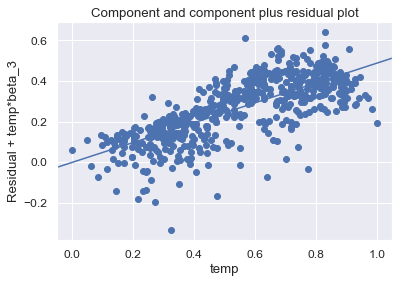

In [70]:
sm.graphics.plot_ccpr(lrm6, 'temp')
plt.show()

**Observation:**
   - Indicates temp variable have high corelation with target variable.

#### Little or no Multicollinearity between the features

In [71]:
# Check for the VIF values of the feature variables. 
checkVIF(X_train_new)

,Features,VIF
2,temp,2.66
0,year,2.04
5,month_July,1.33
4,season_winter,1.31
3,season_spring,1.22
6,month_Sep,1.18
7,weekday_Sun,1.16
1,holiday,1.04
8,weathersit_Light Snow,1.03


**Observation:**
 - From the VIF calculation we could observe that there is no multicollinearity exists between the predictor variables as all the values are within permissible range of below 5. 

#### Error terms are normally distributed with mean zero (not X, Y)

#### Residual Analysis of the train data

In [72]:
#adding constant to the train model
X_train_new=sm.add_constant(X_train_new)
# predicting using X train data
y_train_pred = lrm6.predict(X_train_new)

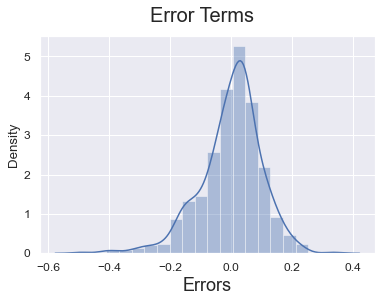

In [73]:
res = y_train-y_train_pred

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)                         
plt.show()

**Observation:**
- we can observe that the Residuals are normally distributed.
- Hence our assumption for Linear Regression is valid.

#### Homoscedasticity Assumption

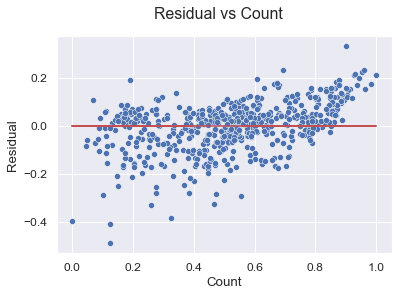

In [74]:
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.suptitle('Residual vs Count')
plt.show()

**Observation:**
   - residuals are equal across the regression line

#### Little or No autocorrelation in the residuals

**Hypothesis Testing:**
- Hypothesis testing states that: 
    - 𝐻0:𝐵1=𝐵2=...=𝐵𝑛=0
    - 𝐻1: at least one  𝐵𝑖!=0

In [75]:
# Print a summary of the linear regression model
print(lrm6.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     244.2
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          8.39e-190
Time:                        03:09:12   Log-Likelihood:                 505.97
No. Observations:                 584   AIC:                            -991.9
Df Residuals:                     574   BIC:                            -948.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.15

**Observations:**
   - From the model summary, it is evident that all coefficients are not equal to zero which means we can Reject the null hypothesis
   - Durbin-Watson Statistic =  1.983
   - A value near 2 indicates non-autocorrelation
   - Since the value of the Durbin-Watson Statistic falls above the upper bound at a 0.01 significance level, there is no evidence the error terms are positively correlated in the model with the transformed variables.

## Step 8: Making Predictions Using the Final Model
- Now we can go ahead and make predictions using our final model as have already fitted model and checked the assumptions



In [76]:
#Applying the scaling on the test sets to all numeric variables.
num_vars = ['temp','humidity', 'windspeed','count']

df_test[num_vars] = scaler.transform(df_test[num_vars])


In [77]:
# checking top 5 rows
df_test.head()


,year,holiday,workingday,temp,humidity,windspeed,count,season_spring,season_summer,season_winter,month_Aug,month_Dec,month_Feb,month_Jan,month_July,month_June,month_Mar,month_May,month_Nov,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist Cloudy
22,0,0,0,0.05,0.45,0.46,0.11,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
468,1,0,0,0.54,0.52,0.35,0.86,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
553,1,0,0,0.95,0.60,0.21,0.53,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
504,1,0,0,0.70,0.55,0.48,0.82,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
353,0,0,1,0.41,0.62,0.08,0.43,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [78]:
df_test.describe()

,year,holiday,workingday,temp,humidity,windspeed,count,season_spring,season_summer,season_winter,month_Aug,month_Dec,month_Feb,month_Jan,month_July,month_June,month_Mar,month_May,month_Nov,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist Cloudy
count,146.00,146.00,146.00,146.00,146.00,146.00,146.00,146.00,146.00,146.00,146.00,146.00,146.00,146.00,146.00,146.00,146.00,146.00,146.00,146.00,146.00,146.00,146.00,146.00,146.00,146.00,146.00,146.00,146.00
mean,0.46,0.04,0.69,0.53,0.67,0.35,0.49,0.26,0.25,0.27,0.03,0.12,0.08,0.09,0.10,0.10,0.10,0.08,0.07,0.10,0.07,0.14,0.10,0.16,0.17,0.14,0.13,0.05,0.34
std,0.50,0.20,0.46,0.23,0.14,0.16,0.22,0.44,0.44,0.44,0.18,0.33,0.26,0.29,0.30,0.30,0.30,0.26,0.25,0.30,0.25,0.35,0.30,0.37,0.38,0.35,0.34,0.21,0.47
min,0.00,0.00,0.00,0.05,0.30,0.07,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.33,0.56,0.23,0.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,1.00,0.52,0.66,0.33,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,1.00,0.00,1.00,0.72,0.76,0.44,0.63,1.00,0.75,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
max,1.00,1.00,1.00,0.98,1.01,0.82,0.94,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [79]:
#Dividing into X_test and y_test
y_test = df_test.pop('count')
X_test = df_test

In [80]:
#cheching the info
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 22 to 491
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    146 non-null    int64  
 1   holiday                 146 non-null    int64  
 2   workingday              146 non-null    int64  
 3   temp                    146 non-null    float64
 4   humidity                146 non-null    float64
 5   windspeed               146 non-null    float64
 6   season_spring           146 non-null    uint8  
 7   season_summer           146 non-null    uint8  
 8   season_winter           146 non-null    uint8  
 9   month_Aug               146 non-null    uint8  
 10  month_Dec               146 non-null    uint8  
 11  month_Feb               146 non-null    uint8  
 12  month_Jan               146 non-null    uint8  
 13  month_July              146 non-null    uint8  
 14  month_June              146 non-null    u

In [81]:
#Selecting the variables that were part of final model.
X_train_new_columns=X_train_new.columns

# Adding constant variable to test dataframe
X_test_lrm6 = sm.add_constant(X_test)

X_test_lrm6=X_test_lrm6[X_train_new_columns]


X_test_lrm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 22 to 491
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   const                  146 non-null    float64
 1   year                   146 non-null    int64  
 2   holiday                146 non-null    int64  
 3   temp                   146 non-null    float64
 4   season_spring          146 non-null    uint8  
 5   season_winter          146 non-null    uint8  
 6   month_July             146 non-null    uint8  
 7   month_Sep              146 non-null    uint8  
 8   weekday_Sun            146 non-null    uint8  
 9   weathersit_Light Snow  146 non-null    uint8  
dtypes: float64(2), int64(2), uint8(6)
memory usage: 6.6 KB


In [82]:
# Making predictions using the final model
y_pred = lrm6.predict(X_test_lrm6)

## Step 9: Model Evaluation

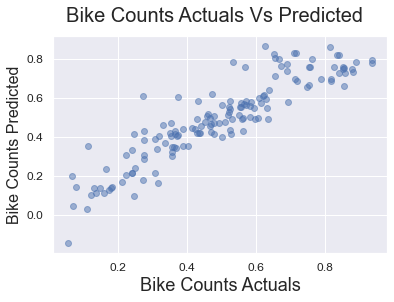

In [83]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('Bike Counts Actuals Vs Predicted', fontsize = 20)              
plt.xlabel('Bike Counts Actuals', fontsize = 18)                          
plt.ylabel('Bike Counts Predicted', fontsize = 16)      
plt.show()

### R^2 Value for Test set

In [84]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.8143582812599554

### Adjusted R^2 Value for Test set
Formula for Adjusted R^2

### $ R^2_{adj.} = 1 - (1-R^2)*\frac{n-1}{n-p-1} $


In [85]:
# n is number of rows in X
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# calculated Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7699312032708848

**Train and Test Final Result Comparison:**
 - Train
   - R^2 :0.793 - Train Adjusted R^2 :0.790
 - Test 
   - R^2 :0.814 - Test Adjusted R^2 :0.769 

This seems to be a really good model.          

**As per our final linear Model, the top 3 predictors that influences the bike booking are:**
- Temperature (temp) - 
    - A coefficient value of ‘0.49’ tells that a unit increase in temp increases the bike counts by 0.49 units. 
- Year (yr) 
    - A coefficient value of ‘0.24’ tells that a unit increase in year increases the bike counts by 0.24 units. 
    
- Weather Situation (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds) - 
    - A coefficient value of ‘-0.29’ tells that a unit increase in weathersit_Light Snow decreases the bike counts by 0.29 units. 

**So It is advice to focus above variables utmost preferences while planning to achive maximum bookings**

The next best predictors that can also be considered are - 

- weekday_Sun: 
    - A coefficient value of ‘0.06’ tells that a unit increase in season_winter increases the bike counts by 0.06 units. 
- season_spring: 
     - A coefficient value of ‘-0.11’ tells that a unit increase in season_spring decreases the bike counts by 0.11 units. 

